## Project: Communicate Data Findings: House Price Data

### Author: Ben Farrell
### Date: 12/05/2020

## Table of Contents
<ol>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#lib">Import Libraries</a></li>
    <li><a href="#Gather">Gathering Data</a></li>
    <li><a href="#Assess">Assessing</a></li>
    <li><a href="#Cleaning">Cleaning</a></li>
    <li><a id="#eda">Exploratory Data Analysis (EDA)</a></li>
        <ol type='1'>
            <li><a href="#Uni">Univariate Exploration</a></li>
            <li><a href="#Uni_summary">Univariate Exploration Summary</a></li>
            <li><a href="#bi">Bivariate Exploration</a></li>
            <li><a href="#bi_summary">Bivariate Exploration Summary</a></li>
            <li><a href='#multi'>Multivariate Exploration</a></li>
            <li><a href='#multi_summary'>Multivariate Exploration Summary</a></li>
        </ol>
    <li><a href="#ref">References</a></li>  
</ol>

<a href="#intro"></a>
## Introduction

Data was collected from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The data consists of information regarding 1460 properties sold in Ames Iowa 
with 79 explanatory variables describing (almost) every aspect of residence.

I aim to produce some useful visualisation to outline correlations between these features and final sale price.

<a id="lib"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
#Set seaborn colour palette to base 
base = sns.color_palette()[0]

<a id="Gather"></a>
## Gathering Data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id="Assess"></a>
## Assessing

In [7]:
Missing_Data = 100*df.isna().sum()/df.shape[0]

In [8]:
Missing_Data.to_frame()

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [9]:
Missing_Data = Missing_Data.sort_values(ascending=False)

In [10]:
Missing_Data

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

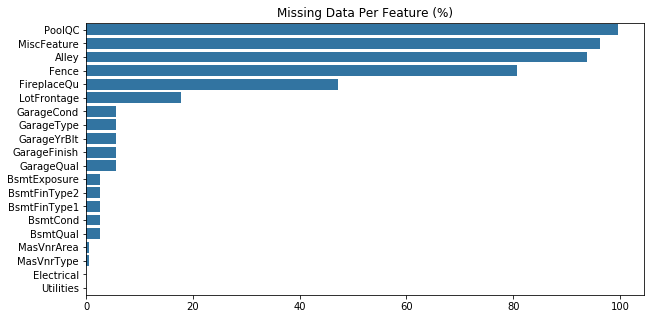

In [11]:
plt.figure(figsize=[10,5])
Miss = Missing_Data[:20].values
labels = Missing_Data[:20].index
sns.barplot(y=labels,x=Miss,color=base)
plt.title('Missing Data Per Feature (%)')
plt.ylabel(''),plt.xlabel('');

In [12]:
df['MiscFeature'][df['MiscFeature'].notnull()].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
df['MiscVal'][df['MiscFeature'] == 'Shed'].mean()

697.8367346938776

In [14]:
df['Neighborhood'][df['PoolArea']>0]

197       NAmes
810      NWAmes
1170    Mitchel
1182    NoRidge
1298    Edwards
1386     NWAmes
1423    Edwards
Name: Neighborhood, dtype: object

The following features with missing data which will be dropped have been done so for several reasons. The first being the % of missing data which cannot easily be inferred or estimated from the other data. The second is the perceived significance/impact on SalePrice.

Pool QC (Ordinal): Pool quality is missing 99.5% of its data. This is because most properties don't have a pool,therefore no value can be assigned. Given that so few properties have a pool, I don't think this will prove to be a valuable feature to predict SalePrice and will therefore be dropped.

Since I have made the decision to drop the Pool QC feature, I shall also dropped pool area because only 7 properties have data populated for this field.

Misc Feature (Nominal): Miscellaneous feature not covered in other categories. Only 54 properties have entries for MiscFeatures. 49 of these are sheds, 2 are second garages, 1 is a tennis court and 2 are 'other'. Given the fact that so much of the data is missing (>95%) and the fact that a shed is of insignificant value ($697) to a property, this feature will be dropped.

I shall also drop MiscVal since Misc Feature is bein dropped.

Alley (Nominal): Type of alley access to property. I have decided to drop this feature given how much data is missing (>90\%) and because I think it's importance to Property Price will be relatively minimal.

Fence (Ordinal): Fence quality which provides a range of privacy from Good to None. I have come to a decision to drop this variable for a sevral reasons:
 - More than 80% data is missing for this feature
 - A fence can likely be errected for moderate cost compared to property
 - Therefore I don't believe this feature will be of significant importance in determining Property Price.

<a id='cleaning'></a>
## Cleaning

In [15]:
#Drop the columns deemed unnecesary due to lack of data and perceived importance to SalesPrice
#Id is of no value to the analysis.
cols = ['PoolQC','PoolArea','MiscFeature','MiscVal','Alley','Fence','Id']
df.drop(columns=cols,inplace=True)

In [16]:
df.shape

(1460, 74)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

### What is the structure of your dataset?

There are 1460 houses in the dataset with 74 features. There is mix or numeric and categorical data


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the houses in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that GridArea, PlotArea, Number of Rooms above Grade and Neighbourhood will have the greatest effect on each house price.

<a id="Uni"></a>
### Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Sales price.

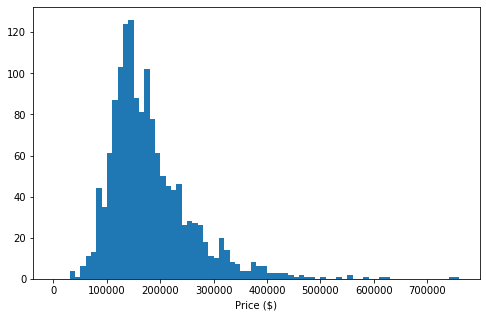

In [17]:
# start with a standard-scaled plot
binsize = 10000
bins = np.arange(0, df['SalePrice'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'SalePrice', bins = bins)
plt.xlabel('Price ($)')
#plt.xlim(0,500)
plt.show()

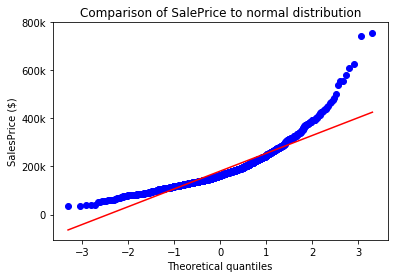

In [18]:
#When compared to a normal distribution,
#it is obvious that SalesPrice in the current form doesn't fit a normal dist profile
fig = plt.figure()
res = stats.probplot(df['SalePrice'],plot=plt)
plt.ylabel('SalesPrice ($)')
plt.yticks([0,2e5,4e5,6e5,8e5],[0,'200k','400k','600k','800k'])
plt.title('Comparison of SalePrice to normal distribution')
plt.show()

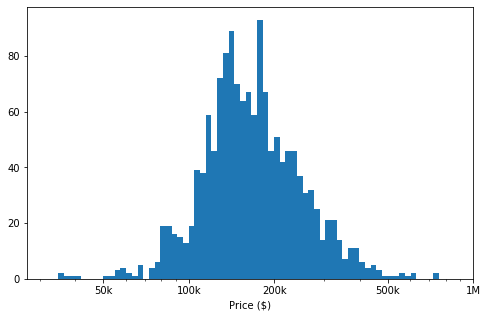

In [19]:
# Long tail on right skewed data, so attempt plotting the data in log scale
log_binsize = 0.02
bins = 10 ** np.arange(4.5, np.log10(df['SalePrice'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'SalePrice', bins = bins)
plt.xscale('log')
plt.xticks([5e4, 1e5, 2e5, 5e5, 1e6], ['50k','100k', '200k', '500k', '1M'])
plt.xlabel('Price ($)')
plt.show()

In [20]:
df['LogTransSalePrice'] = np.log10(df['SalePrice'])

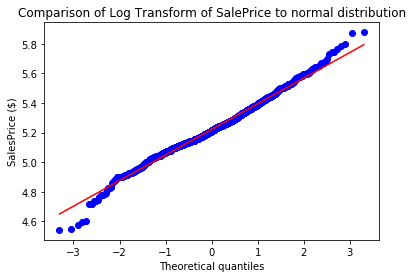

In [21]:
fig = plt.figure()
res = stats.probplot(df['LogTransSalePrice'],plot=plt)
plt.ylabel('SalesPrice ($)')
#plt.yticks([0,2e5,4e5,6e5,8e5],[0,'200k','400k','600k','800k'])
plt.title('Comparison of Log Transform of SalePrice to normal distribution')
plt.show()

Sales price is right skewed. The mean sales price for the dataset is USD180K.

75% of the data falls below USD214K.

When applying a log transform (base10), the data falls onto a normal distribution. This is evident from the histogram plot of Log Transform SalePrice and the comparison of the Log Transform Data to the normal distribution.

I'll now investigate some of the numberical variables which I believe will have the most impact on house price. These will incude:
- LotArea (Continuous): Total Lot Area
- TotalBsmtSf (Continuous): Total square feet of basement area
- GrLivArea (Continuous): Above grade (ground) living area square feet
- GarageArea (Continuous): Area of Garage
- GarageCars (Discrete): Number of car spaces in the Garage
- BuildYear (Discrete): Year the resisdence was built
- TotRmsAbvGrd (Discrete): Total Rooms above Grade (Not including Bathrooms)

Bathroom data is split between:
 - BsmtFullBath (Discrete): Basement full bathrooms
 - BsmtHalfBath (Discrete): Basement half bathrooms
 - FullBath (Discrete): Full bathrooms above grade
 - HalfBath (Discrete): Half baths above grade

I'm giong to create a new feature which just provides the total number of bathrooms. Summing the value of these four features.
- TotBaths (Discrete):

In [25]:
#Feature Creation and redundant feature removal
baths = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
df['TotBaths'] = df.BsmtFullBath + df.FullBath + (df.BsmtHalfBath + df.HalfBath)/2
df.drop(columns=baths,inplace=True)

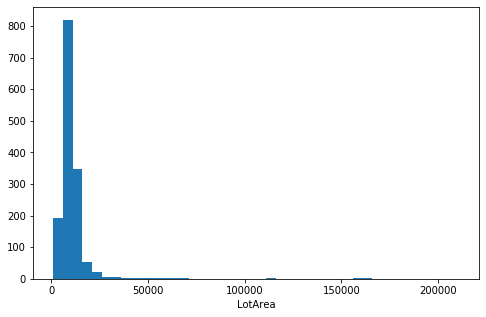

In [26]:
# Investigate LotArea
binsize = 5000
bins = np.arange(1000, df['LotArea'].max(), binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LotArea', bins = bins)
#plt.xlim([0.2,1.5])
plt.xlabel('LotArea')
plt.show()

Some large plot sizes are skewing the data to the right. I'll crop these out to give a better view of the LotAreas below 50,000

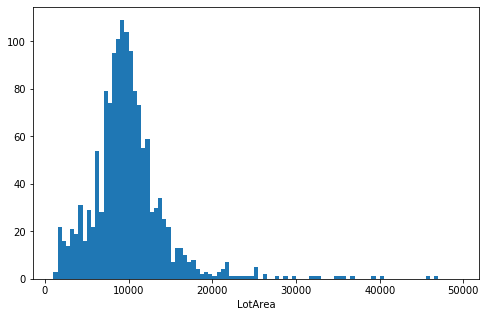

In [27]:
binsize = 500
bins = np.arange(1000, 50000, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LotArea', bins = bins)
#plt.xlim([0.2,1.5])
plt.xlabel('LotArea')
plt.show()

The mean LotArea is approximately 10,000 sq foot

Lets have a look at the Basement Area, this will give a good indication of house floor plan per level.

TotalBsmtSF: Total square feet of basement area

In [28]:
df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

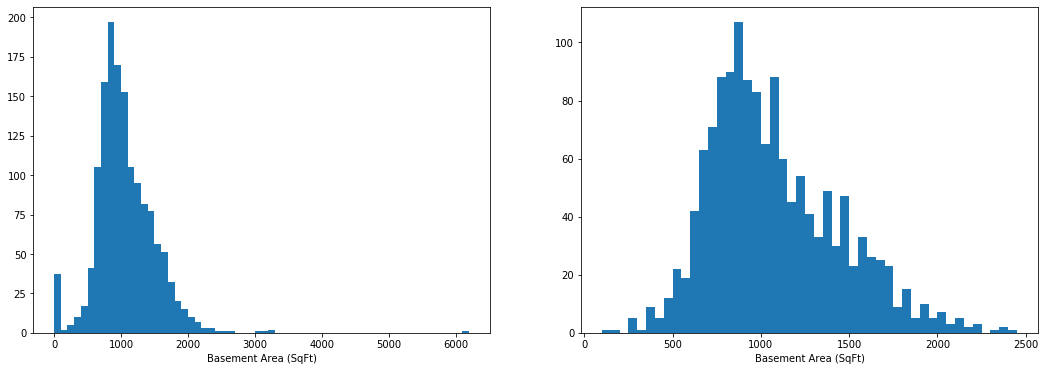

In [29]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
binsize = 100
bins = np.arange(0,df['TotalBsmtSF'].max()+binsize,binsize)
plt.hist(df['TotalBsmtSF'],bins=bins)
plt.xlabel('Basement Area (SqFt)')

plt.subplot(1,2,2)
binsize = 50
bins = np.arange(100,2500,binsize)
plt.hist(df['TotalBsmtSF'],bins=bins)
plt.xlabel('Basement Area (SqFt)');

Those basements reporting an area of zero are likely to be apartments or just don't have a basement. Basements with zero area were removed from the distribution on the RHS, as were those with basements greatet than 2500 sq ft. This was to better visualize the bulk of the data

Lets have a look at the above ground living area

GrLivArea: Above grade (ground) living area square feet

In [30]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

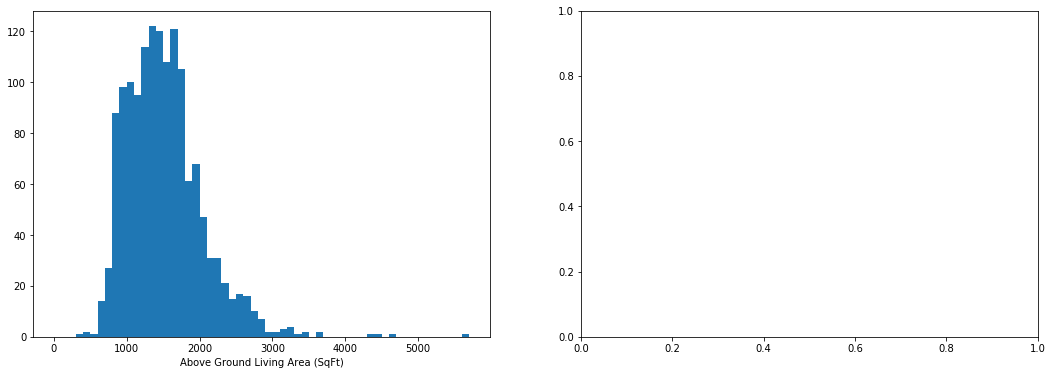

In [31]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
binsize = 100
bins = np.arange(0,df['GrLivArea'].max()+binsize,binsize)
plt.hist(df['GrLivArea'],bins=bins)
plt.xlabel('Above Ground Living Area (SqFt)')

plt.subplot(1,2,2)



Lets have a look at Garage and Pool Data. Residences which have a Garage and a Pool are likely to be on the upper end of the price scale, but I would like to understand the distribution.

In [32]:
df['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

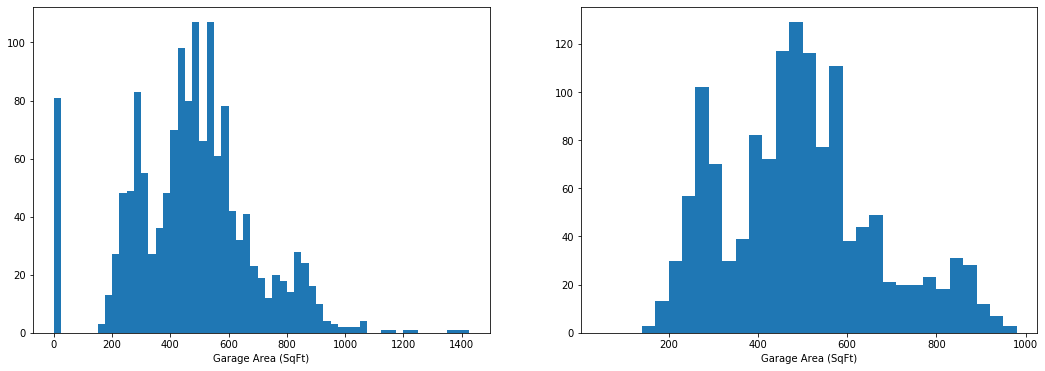

In [33]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
binsize = 25
bins = np.arange(0,df['GarageArea'].max()+binsize,binsize)
plt.hist(df['GarageArea'],bins=bins)
plt.xlabel('Garage Area (SqFt)')

plt.subplot(1,2,2)
binsize = 30
bins = np.arange(50,1000,binsize)
plt.hist(df['GarageArea'],bins=bins)
plt.xlabel('Garage Area (SqFt)');

Garage area appears to be bimodal. There is on peak at approximately 200 sq ft and another at 500 sq ft. This probably aligns to a single car birth and a double car birth. Lets look at the number of car spaces to see if this makes sense.

In [34]:
df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

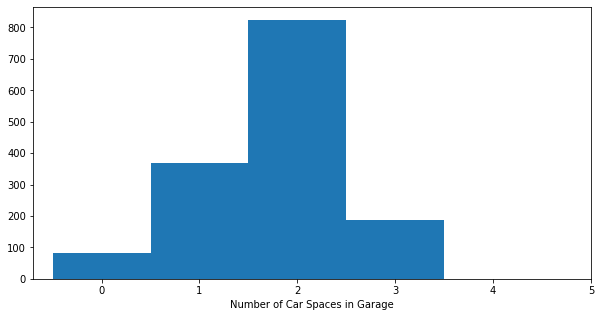

In [35]:
binsize=1
bins = np.arange(0,df['GarageCars'].max()+binsize,binsize)
plt.figure(figsize=[10,5])
plt.hist(df['GarageCars'],bins=bins)
plt.xticks(np.arange(0.5,6.5,1),np.arange(0,6,1))
plt.xlabel('Number of Car Spaces in Garage');

Lets have a look at build year

YearBuilt: Original construction date

In [36]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

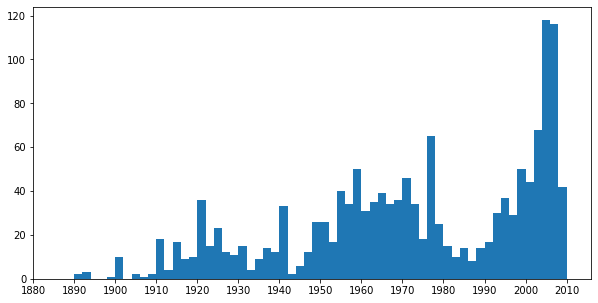

In [37]:
plt.figure(figsize=[10,5])
bins = np.arange(1890,2011,2)
plt.hist(df['YearBuilt'],bins=bins)
plt.xticks(np.arange(1880,2011,10));

House Building had two small spikes in the early 70s and mid 70s. There is a gradual rise is house building from the early 90s to millenium. From early 2000s there was a real boom in house building unitl 2008. This aligns with the financial crash and and era of recession which explains the sharp fall in house building.

Lets have a look at the distribution of Total Rooms Above Grade (Not including Bathrooms) 

In [38]:
df['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

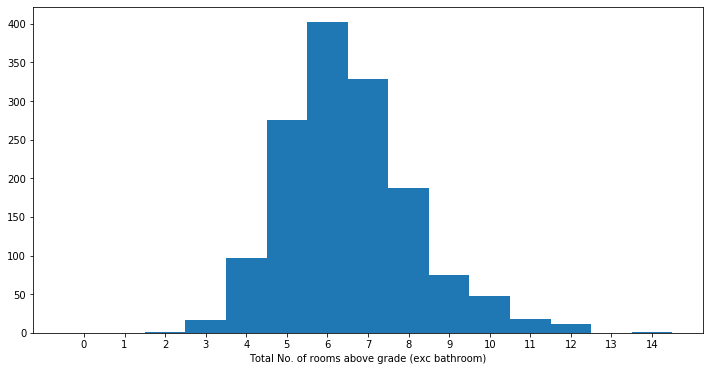

In [39]:
binsize = 1
plt.figure(figsize=[12,6])
bins = np.arange(0,df['TotRmsAbvGrd'].max()+2,binsize)
plt.hist(data=df, x='TotRmsAbvGrd',bins= bins);
plt.xticks(np.arange(0.5,15.5,1),np.arange(0,16,1))
plt.xlabel('Total No. of rooms above grade (exc bathroom)');

Finaly lets have a look at the distribution of Total Number of Bathrooms (Created Feature)

This feature was created by combining all bathroom data for above and below grade and half bathrooms which I am asssuming only have a bath/shower or toilet.

In [40]:
df['TotBaths'].value_counts()

2.0    456
2.5    295
1.0    228
3.0    186
3.5    144
1.5    129
4.0     13
4.5      7
5.0      1
6.0      1
Name: TotBaths, dtype: int64

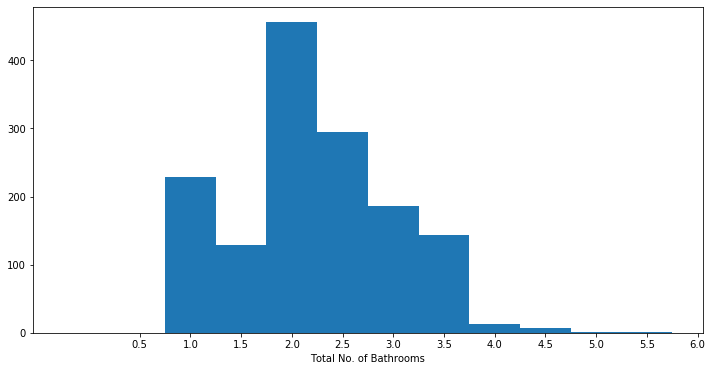

In [41]:
binsize = 0.5
plt.figure(figsize=[12,6])
bins = np.arange(0,df['TotBaths'].max()+binsize,binsize)
plt.hist(data=df, x='TotBaths',bins= bins);
plt.xticks(np.arange(0.75,6.75,0.5),np.arange(0.5,6.5,0.5))
plt.xlabel('Total No. of Bathrooms');

Lets now explore some of the categorical variables

The key categorical variables I would like to explore are:

- OveralQual (Ordinal): Overall material and finish quality.
    * 10 Excellent - 1 Very Poor
- OverallCond (Ordinal): Rates the overall condition of the house.
    * 10 Excellent - 1 Very
- Neighborhood (Nominal): Neighborhood where residence is located.
- BldgType (Nominal): Type of Building/Residence:
    * 1Fam	Single-family Detached
    * 2FmCon	Two-family Conversion; originally built as one-family dwelling
    * Duplx	Duplex
    * TwnhsE	Townhouse End Unit
    * TwnhsI	Townhouse Inside Unit
- ExterQual (Ordinal) - Evaluates the quality of the material on the exterior: 
   * Ex	Excellent
   * Gd	Good
   * TA	Average/Typical
   * Fa	Fair
   * Po	Poor
   
- Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior:
   * Ex	Excellent
   * Gd	Good
   * TA	Average/Typical
   * Fa	Fair
   * Po	Poor
   
- Exterior1st (Nominal): Exterior Covering on House
- Heating (Nominal): Type of heating
- CentralAir (Nominal): Central air conditioning
- SaleType (Nominal): Type of sale

In [42]:
#Looking at OverallQual First
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

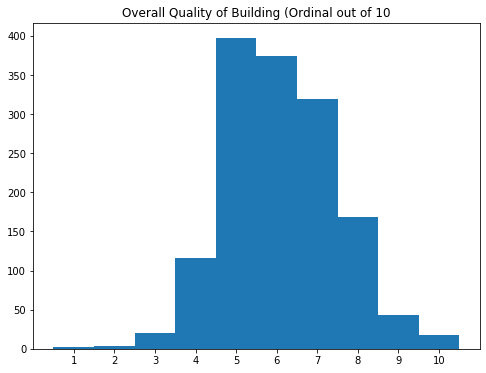

In [43]:
bins = np.arange(1,12,1)
plt.figure(figsize=[8,6])
plt.hist(df['OverallQual'],bins=bins)
plt.xticks(np.arange(1.5,11.5,1),[i for i in range(1,11)])
plt.title('Overall Quality of Building (Ordinal out of 10');

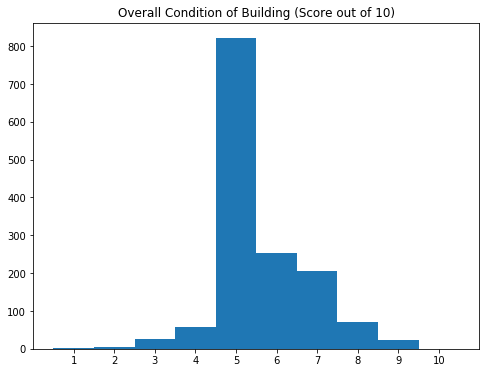

In [44]:
#Overall Condition
bins = np.arange(1,12,1)
plt.figure(figsize=[8,6])
plt.hist(df['OverallCond'],bins=bins)
plt.xticks(np.arange(1.5,11.5,1),[i for i in range(1,11)])
plt.title('Overall Condition of Building (Score out of 10)');

In [45]:
#Review the number of resisdences per neighborhood
Neighborhood = df['Neighborhood'].value_counts()

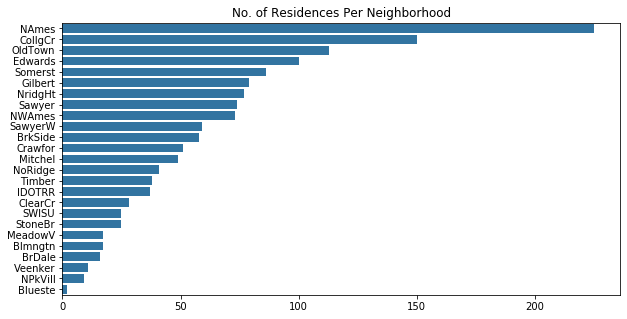

In [46]:
plt.figure(figsize=[10,5])

Neigh_Nums = Neighborhood.values
labels = Neighborhood.index
sns.barplot(y=labels,x=Neigh_Nums,color=base)
plt.title('No. of Residences Per Neighborhood')
plt.ylabel(''),plt.xlabel('');

In [47]:
#Review distribution of Building Types
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [48]:
#Review exterior quality
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [49]:
#Review exterior condtion
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

All roof styles other than 'Flat and 'Shed' are sloping roofs. Since 99% of them are sloping roofs, this will not provide an insight into the prediction of price.

In [50]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [51]:
#Classifying Materials
material = {'AsbShng': 'Other',
            'AsphShn': 'Other',
            'BrkComm': 'Brick',
            'BrkFace': 'Brick',
            'CBlock': 'Brick',
            'CemntBd': 'Cement',
            'HdBoard': 'Wood',
            'ImStucc': 'Cement',
            'MetalSd': 'Metal',
            'Other': 'Other',
            'Plywood':'Wood',
            'PreCast':'Cement',
            'Stone':'Other',
            'Stucco':'Cement',
            'VinylSd':'Vinly',
            'Wd Sdng':'Wood',
            'WdShing':'Wood'}

In [52]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [53]:
def exteriorClass(row):
    return material[row['Exterior1st']]

In [54]:
df['Ext'] = df.apply(exteriorClass,axis=1)

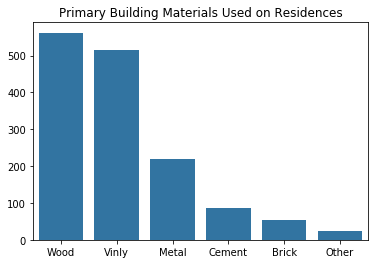

In [55]:
BuildMat = df['Ext'].value_counts().values
Labels = df['Ext'].value_counts().index
sns.barplot(x=Labels,y=BuildMat,color=base)
plt.title('Primary Building Materials Used on Residences');

In [56]:
PrimaryHeat = df['Heating'].value_counts().index[0]
percent = 100*df['Heating'].value_counts()[0]/df.shape[0]
print('Since {:.2f}% of Residences use {},\n\
this feature will not provide a distibguishing guidance on price'.format(percent,PrimaryHeat))

Since 97.81% of Residences use GasA,
this feature will not provide a distibguishing guidance on price


In [57]:
AC = df['CentralAir'].value_counts().index[0]
percent = 100*df['CentralAir'].value_counts()[0]/df.shape[0]
print('Since {:.2f}% of Residences have A/C,\n\
this feature will not provide a distibguishing guidance on price'.format(percent))

Since 93.49% of Residences have A/C,
this feature will not provide a distibguishing guidance on price


In [58]:
#Review of Sales Type
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [59]:
#Review of Sales Condition
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<a id="Uni_summary"></a>
### Univariate Exploration Summary

The SalesPrice variable was right skewed with a long tail of higher prices. The SalesPrice data in this form didn't follow a normal distribution. However, when transformed in the log scale, the data followed a normal distribution. This would enable linear regression models to predict this variable now.

The mean of the SalesPrice distribution was USD180K. 

Garage area appears to be bimodal. There is on peak at approximately 200 sq ft and another at 500 sq ft. This probably aligns to a single car birth and a double car birth.

House Building had two small spikes in the early 70s and mid 70s. There is a gradual rise is house building from the early 90s to millenium. From early 2000s there was a real boom in house building unitl 2008. This aligns with the financial crash and and era of recession which explains the sharp fall in house building.

The most frequent rating of a property is 5/10 for a OverallQuality, however ratings of 6 and 7 and are not far behind. 

By far the most frequent rating for Overall Condition was 5/10. (56% of all properties)

The Neighbourhood with the most properties is North Ames (15% of total), followed by College Creek (10%) and Old Town (8%).  Bluestem has the least properties with 0.1% of the total.

85% of all properties are Single Family Detached Homes. That being the case, I don't think feature will provide much insight because of the lack of variation.

More than 90% of properties are ranked Average or Good for Exterior Building Quality. Similar to Exterior Condition.

Wood is the most common building material, closely followed by Vinyl.

Greater than 90% of home have full central heating and air conditioning. 


From the Categorical Variables variables, only Neighborhood and Primary Building Material appear to be of use to help predict SalesPrice.

<a id="bi"></a>
### Bivariate Exploration

I'll start by plotting a heat map of the numerical variables against LogTransform of SalesPrice.

- LotArea: Total Lot Area
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- GarageArea: Area of Garage
- OveralQual: Overall material and finish quality
- BedroomAbvGr: Number of bedrooms
- BuildYear: Year the resisdence was built
- GarageCars: Number of car spaces in the Garage
- TotalRmsAbvGrd: Total Rooms Above Grade
- TooBaths: Bathrooms

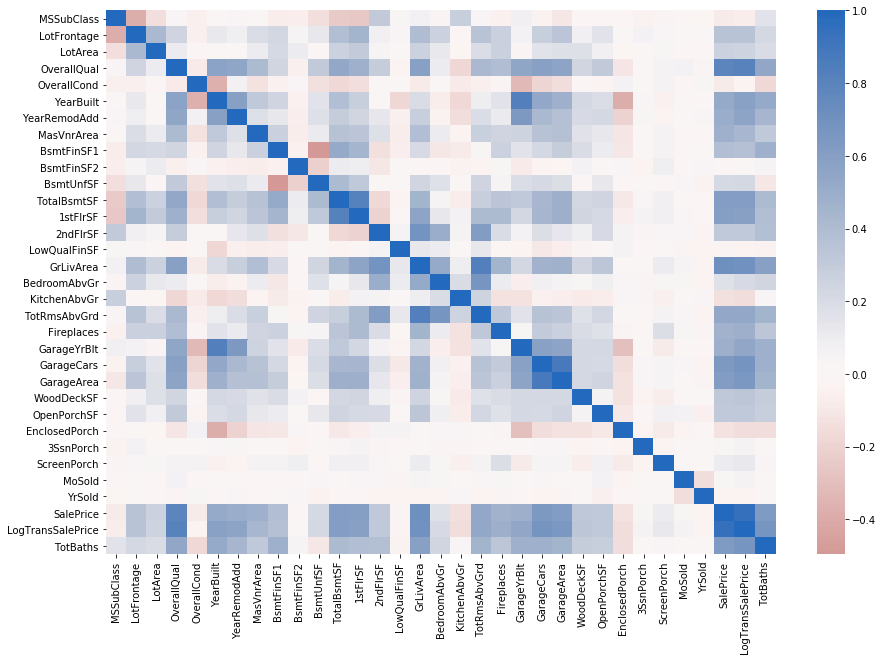

In [60]:
num = df.select_dtypes(include=np.number)
plt.figure(figsize= [15,10])
sns.heatmap(num.corr(),annot=False,fmt='.3f',cmap ='vlag_r',center=0)
plt.show()

The initial large heat map is useful to determine the correlation between a features. It is also useful to detect colinearity which could impact any regression models built at a later stage.

Obvious cases of colinearity:

- LotFrontage and LotArea - This makes sense. LotFrontage is distance which will be used to calculate LotArea
- BsmtSqFt and 1st Floor Square footage. This is also obvious, because Basement size will usually determine floor sizes above
- Garage cars and area. This is intuative
- Sales Price and Log Sales Prices. Again this is to be expected.
- OverallCondtion and Year Built

Lets drop a few of these values which may create colinearity in any later models


In [61]:
df_clean = df.copy()

In [62]:
drop = ['LotFrontage','1stFlrSF','GarageArea','YearRemodAdd','GarageYrBlt']
df_clean.drop(columns=drop,inplace=True)

In [63]:
#Find the 10 features which have the largest correlation with LogTransSalesPrice
cols = list(df_clean.corr().nlargest(11,'LogTransSalePrice').index)

In [64]:
#Drop SalePrice
cols.remove('SalePrice')
#Place LogTransSalePrice at the end
cols.remove('LogTransSalePrice')
cols.append('LogTransSalePrice')

In [65]:
zoomed = df_clean[cols]

In [66]:
zoomed.corr()['LogTransSalePrice']

OverallQual          0.817184
GrLivArea            0.700927
GarageCars           0.680625
TotBaths             0.673011
TotalBsmtSF          0.612134
YearBuilt            0.586570
TotRmsAbvGrd         0.534422
Fireplaces           0.489449
MasVnrArea           0.430809
LogTransSalePrice    1.000000
Name: LogTransSalePrice, dtype: float64

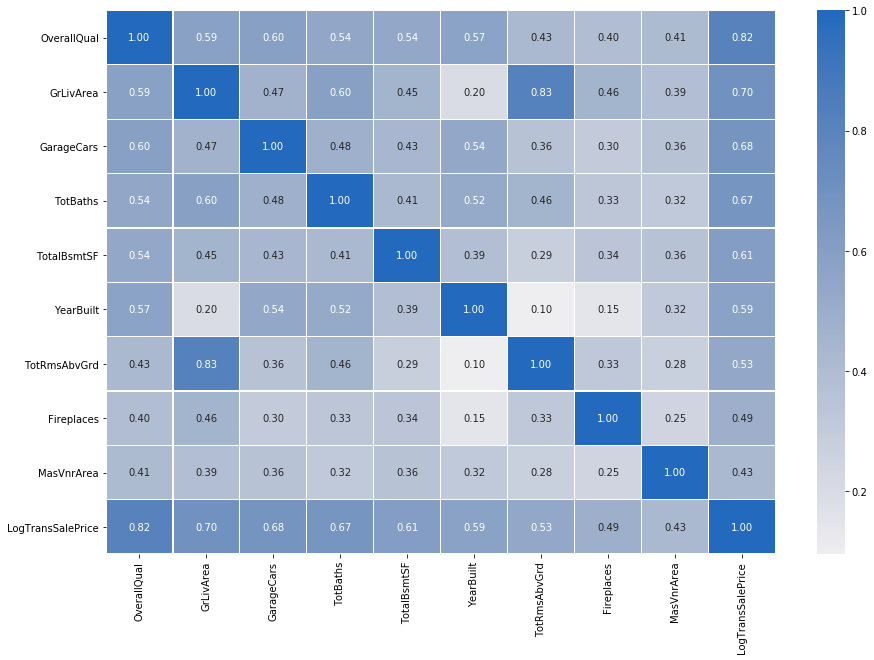

In [67]:
#Plot Zoomed in Heatmap on the 10 most correlated features to Log Transformed Sales Price
plt.figure(figsize= [15,10])
sns.heatmap(zoomed.corr(),annot=True,fmt='.2f',cmap ='vlag_r',center=0,linewidths=0.25)
plt.show()

In [68]:
#Some of features identified above as having the highest correlation with Log Transformed Sales Price will be 
#removed from pair plots below. This is because they are already captured by higher correlatd features or
# because they are actually categorical (OverallQual)

# Basement Area probably captured in the Total Liveable area in by GrdLivArea
# Fireplaces by TotRoomsAboveGrade
# Vnr Area deemed irrelavnt. Better covered by building material 


remove = ['TotalBsmtSF','Fireplaces','MasVnrArea']
for item in remove:
    cols.remove(item)

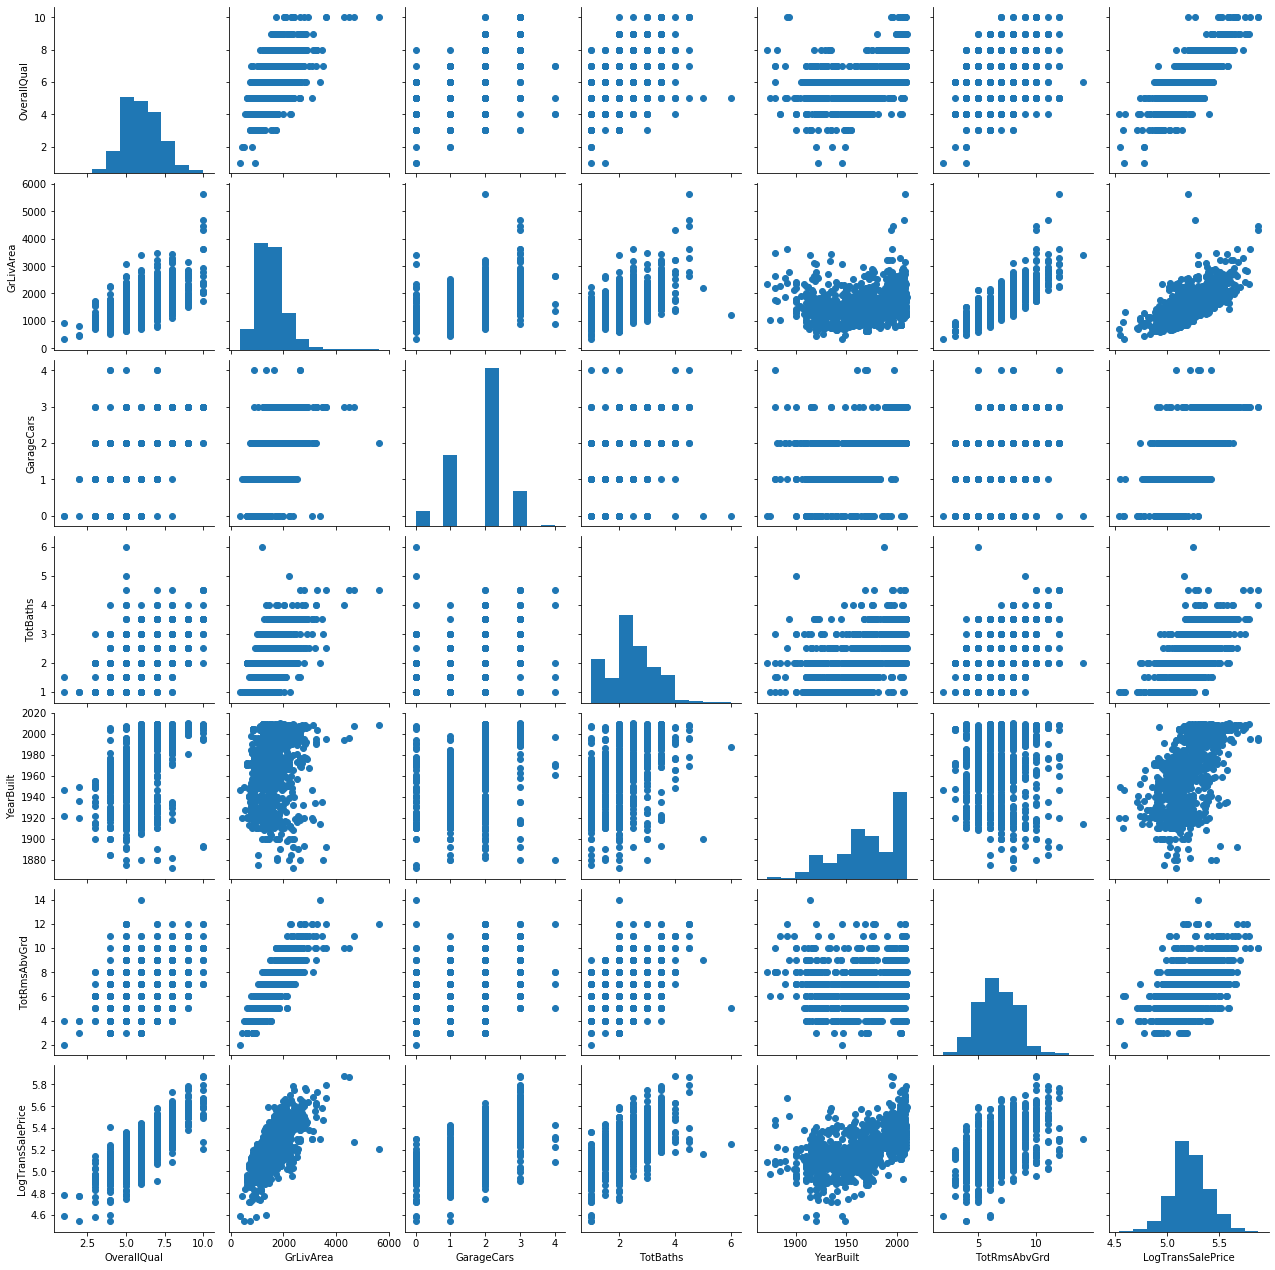

In [69]:
# See some pair plot of the key numerical features
g = sns.PairGrid(data = df_clean, vars = cols)
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter)

**Review of PairPlots**

- OverallQual - The overall build quality is has a strong postive correlation to Log Sales Price.
- GridLivArea - The overall livable area has a strong postive correlation to Log Sales Price. There are some outliers in this data that need to be investigated further. GridLivArea of 4000-6000 at a price of 10e5.25 (USD177K) This appears low for that area
- GarageCars, Bathrooms, Rooms Above Ground all have positive correlations with Log Sales Price.
- Build Year also shows a positve correlation with LogSalePrice. This could be due to inflation over the observation period for building materials. There are some outliers at the low end which appear quite expensive. These should be investigated.


Although OverallQual is a numerical variable, it can actually be considered more as a categorical variable. I'll change the variable to a categorical one and plot it with the Categorical Variables next

**Explore Outlier**
Grid Liveable Area has a few outliers identified on the pair plots. These have a relatively low price given the grid area. I'll check these results to see if they should be addressed.

In [70]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice']<190000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogTransSalePrice,TotBaths,Ext
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,10,2007,New,Partial,184750,5.266584,4.5,Cement
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,1,2008,New,Partial,160000,5.204120,4.5,Cement


Perhaps the outliers are due to Partial Sale or being sold during the Financial Crisis, however there are many other properties sold with these parameters so this doesn't provide a conclusive argument.

On this basis I will drop thse two entries from the dataset.

In [71]:
df_clean = df_clean.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice']<190000)].index)

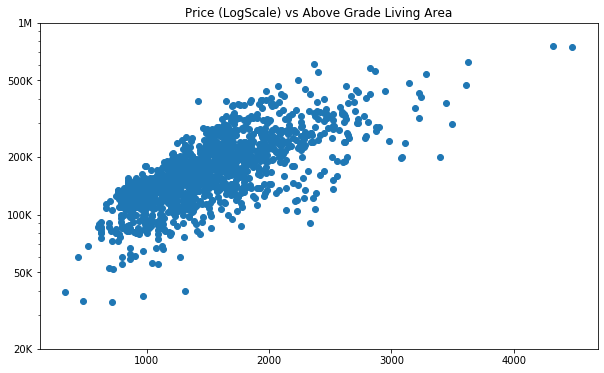

In [72]:
#check they have been dropped
plt.figure(figsize=[10,6])
plt.scatter(df_clean['GrLivArea'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs Above Grade Living Area');

In [73]:
#Remove outliers from Bathrooms Plot
df[(df['TotBaths'] > 4.5)]
df_clean.drop(df[(df['TotBaths'] > 4.5)].index,inplace=True)

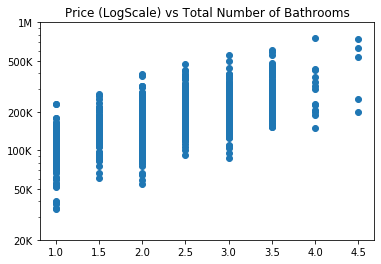

In [74]:
#check they have been dropped
plt.scatter(df_clean['TotBaths'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs Total Number of Bathrooms');

**Now onto the Categorical Variables**

In [75]:
df_clean.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'Log

In [77]:
#Change Overall Build Quality to Categorical Variable Type
BuildQaul = np.arange(1,11,1)
BuildRank = pd.api.types.CategoricalDtype(ordered=True,categories=BuildQaul)
df_clean['OverallQual'] = df_clean['OverallQual'].astype(BuildRank)

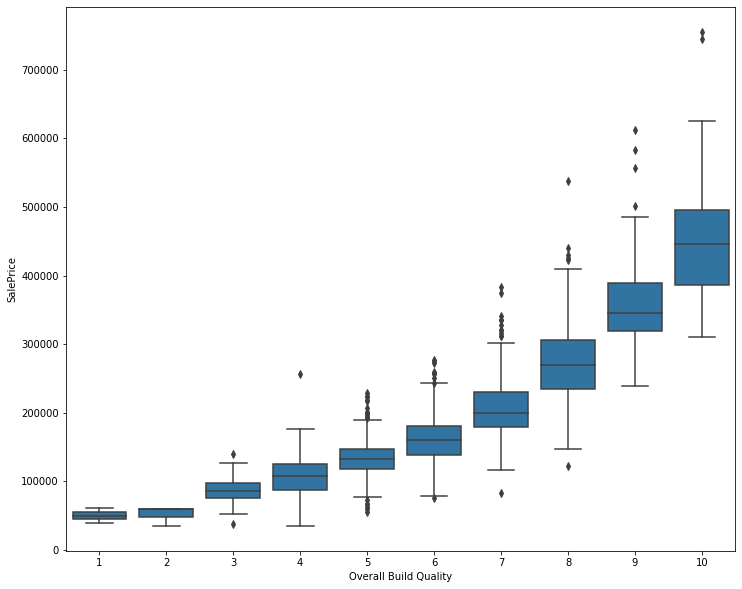

In [78]:
#Plotting Sales Price vs Overall Qaulity on a linear scales shows a polynomial increase.
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'OverallQual', y = 'SalePrice', color = base)
plt.xlabel('Overall Build Quality');

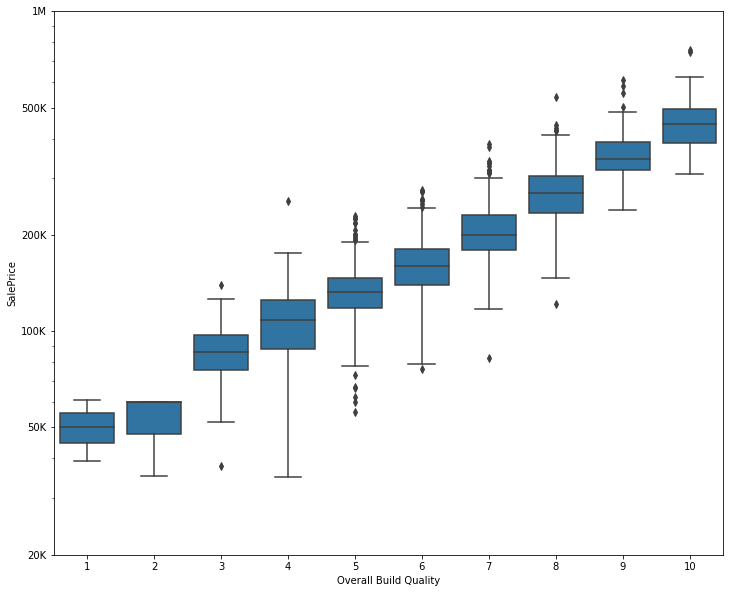

In [79]:
#A linear trends is observed when plotting Sales Price vs Ovearll Quality when Sales Price Axis is on a log Scale
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'OverallQual', y = 'SalePrice', color = base)
plt.xlabel('Overall Build Quality')
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M']);

In [80]:
#Sort neighborhoods by highest mean selling price
nieghbourhood = list(df.groupby('Neighborhood').mean()['SalePrice'].sort_values().index)

#Create Categorical Variable for Neighbourhood Based on mean
NeighRank = pd.api.types.CategoricalDtype(ordered=True,categories=nieghbourhood)
df_clean['NeighbourhoodRank'] = df_clean['Neighborhood'].astype(NeighRank)

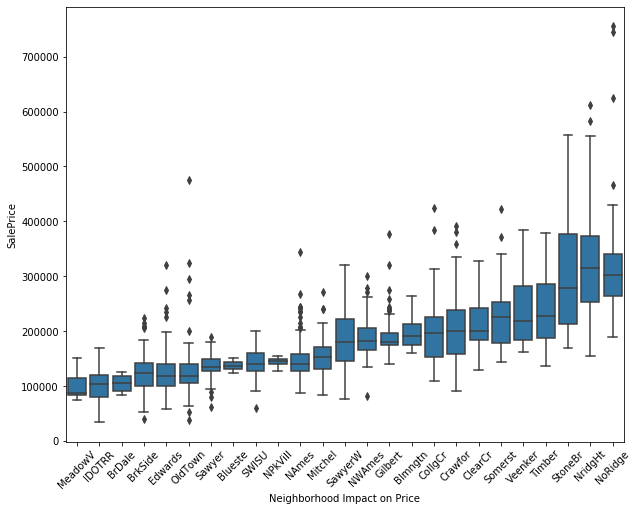

In [81]:
#Plotting Sales Price vs Neighbourhood on a linear scale.
plt.figure(figsize=(10,8))
sns.boxplot(data = df_clean, x = 'NeighbourhoodRank', y = 'SalePrice', color = base)
plt.xlabel('Neighborhood Impact on Price')
plt.xticks(rotation=45);

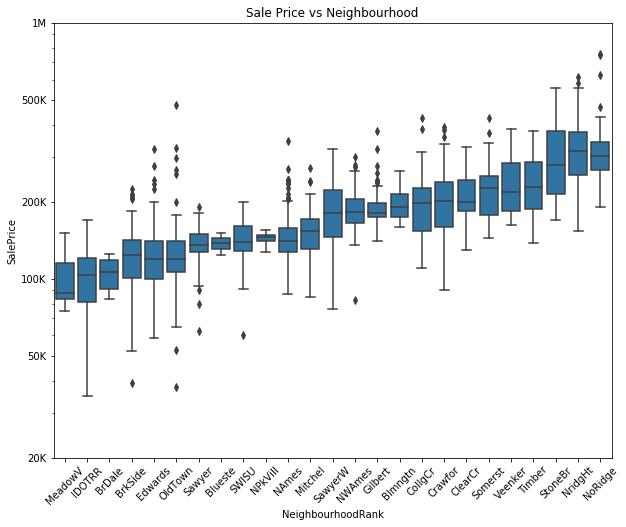

In [82]:
#Plotting Sales Price vs Neighbourhood on a log scale.
plt.figure(figsize=(10,8))
sns.boxplot(data = df_clean, x = 'NeighbourhoodRank', y = 'SalePrice', color = base)
plt.title('Sale Price vs Neighbourhood')
plt.xticks(rotation=45)
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M']);

Neighbourhood is obviously an important factor to consider when attempting to predict SalePrice of a property.

MeadowV is has the lowest mean House Price, whereas NoRidge has the highest mean House Price.

Let's have a look at the primary Building Material and External Build Quality

In [83]:
#Sort Building Material by highest mean selling price
material = list(df_clean.groupby('Ext').mean()['SalePrice'].sort_values().index)

#Create Categorical Variable for Material Based on mean
matRank = pd.api.types.CategoricalDtype(ordered=True,categories=material)
df_clean['ExtRank'] = df_clean['Ext'].astype(matRank)

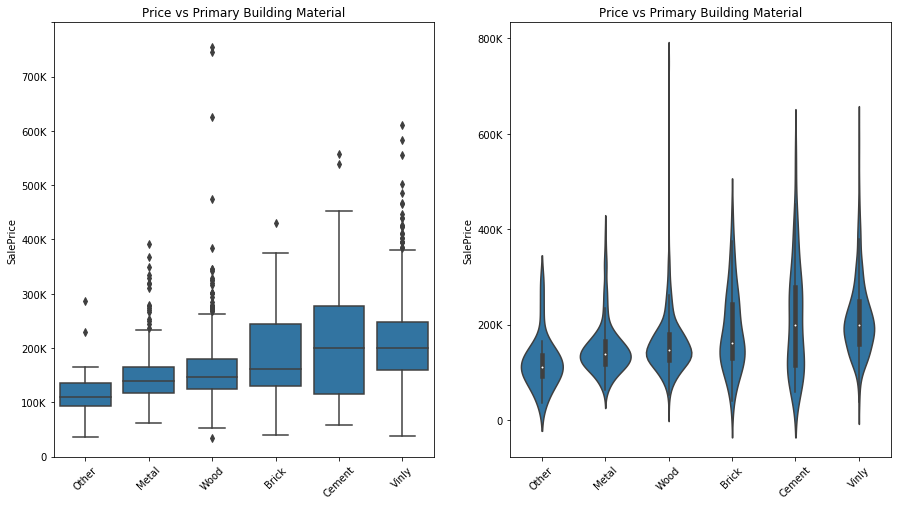

In [84]:
#Plotting Sales Price vs Material on a linear scale.

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(data = df_clean, x = 'ExtRank', y = 'SalePrice', color = base)
plt.title('Price vs Primary Building Material')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,9e5,1e5),['0','100K','200K','300K','400K','500K','600K','700K'])
plt.xlabel('')

plt.subplot(1,2,2)
sns.violinplot(data = df_clean, x = 'ExtRank', y = 'SalePrice', color = base)
plt.title('Price vs Primary Building Material')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,10e5,2e5),['0','200K','400K','600K','800K'])
plt.xlabel('');

Vinyl built properties are on average the most expensive. The "other" building class material has the lowest mean SalePrice, this includes materials such as Asphalt and Asbestos Shingles.

Lets have a look at the Build Matertial associated with Overall Quality

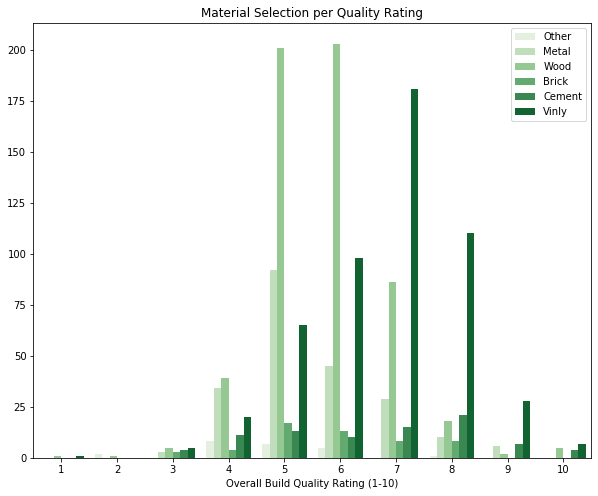

In [85]:
plt.figure(figsize=[10,8])
sns.countplot(data = df_clean, x = 'OverallQual', hue = 'ExtRank', palette = 'Greens')
plt.title('Material Selection per Quality Rating')
plt.ylabel('')
plt.xlabel('Overall Build Quality Rating (1-10)')
plt.legend(loc=1);

In the lowest quality properties (<5), wood and metal are the most popular building materials. 

In the mediocre properties (5-6) wood is by far the most common build material. Then in the higher quality properties (7+) vinyl is the most common build material.

<a id="bi_summary"></a>
### Bivariate Exploration Summary

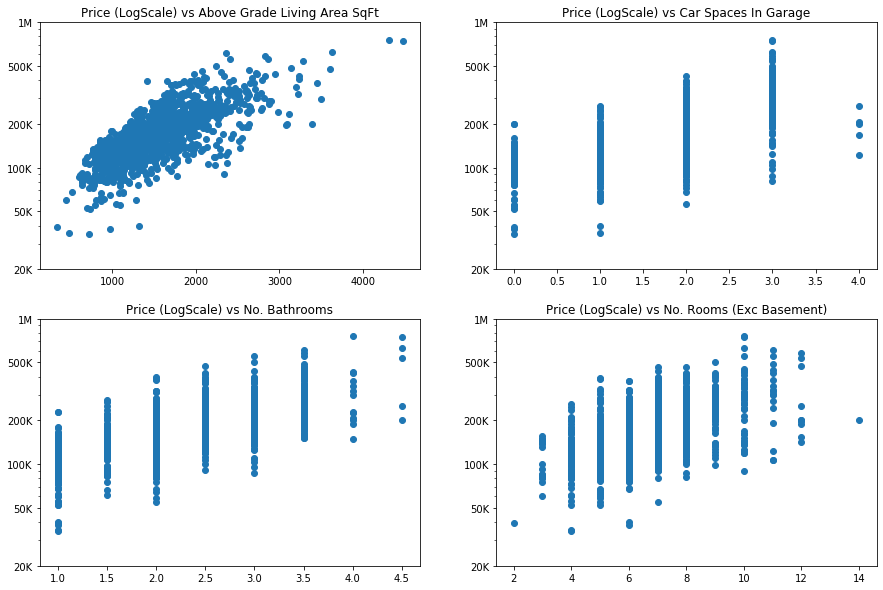

In [86]:
plt.figure(figsize=[15,10])

plt.subplot(221)
plt.scatter(df_clean['GrLivArea'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs Above Grade Living Area SqFt');

plt.subplot(222)
plt.scatter(df_clean['GarageCars'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs Car Spaces In Garage');

plt.subplot(223)
plt.scatter(df_clean['TotBaths'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs No. Bathrooms');

plt.subplot(224)
plt.scatter(df_clean['TotRmsAbvGrd'],df_clean['SalePrice'])
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price (LogScale) vs No. Rooms (Exc Basement)');

Of the numerical variables, those with the strongest correlation to SalesPrice are:

* Liveable Area Above Grade (Square Ft) (Continuous)
* Number of Garage Car Spaces (Discrete)
* Number of Bathrooms (Discrete)
* Number of Rooms above Grade (Discrete)

Several outliers were identified and have been removed from the data.

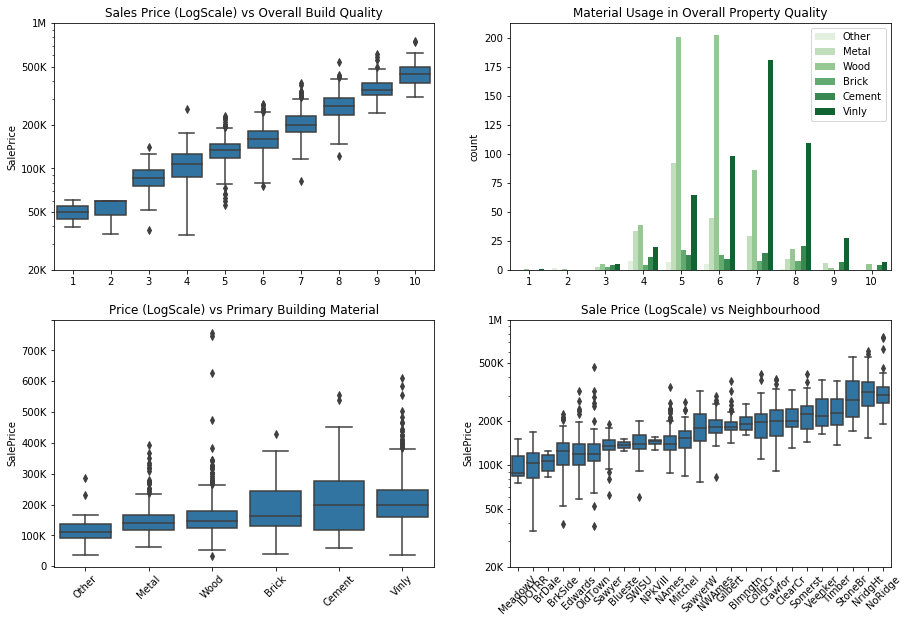

In [87]:
plt.figure(figsize=[15,10])

plt.subplot(221)
sns.boxplot(data = df_clean, x = 'OverallQual', y = 'SalePrice', color = base)
plt.title('Sales Price (LogScale) vs Overall Build Quality')
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.xlabel('')

plt.subplot(224)
sns.boxplot(data = df_clean, x = 'NeighbourhoodRank', y = 'SalePrice', color = base)
plt.title('Sale Price (LogScale) vs Neighbourhood')
plt.xlabel('')
plt.xticks(rotation=45)
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])

plt.subplot(223)
sns.boxplot(data = df_clean, x = 'ExtRank', y = 'SalePrice', color = base)
plt.title('Price (LogScale) vs Primary Building Material')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,9e5,1e5),['0','100K','200K','300K','400K','500K','600K','700K'])
plt.xlabel('')

plt.subplot(222)
sns.countplot(data = df_clean, x = 'OverallQual', hue = 'ExtRank', palette = 'Greens')
plt.title('Material Usage in Overall Property Quality')
plt.xlabel('')
plt.legend(loc=1);

Of the Categorical variables, those with the strongest correlation to SalesPrice are:

* Overall Build Quality (Grade 1 - 10) (Ordinal)
* Main Building Material (Nominal)
* Neighbourhood (Nominal)

<a id='multi'></a>
## Multivariate Exploration

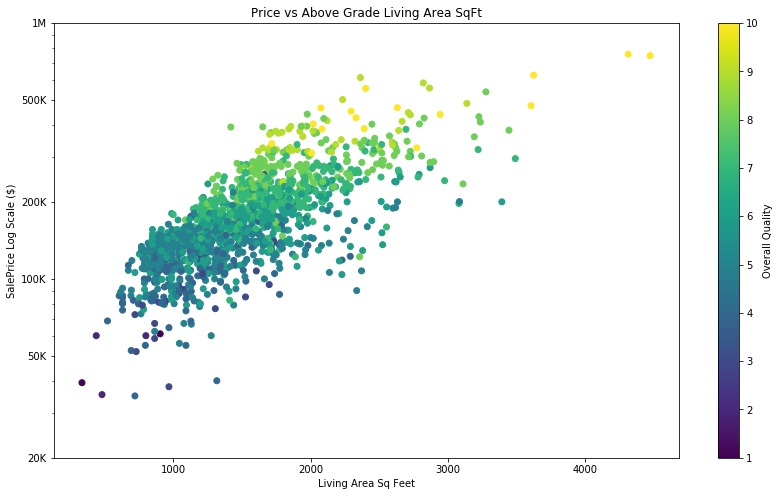

In [88]:
plt.figure(figsize=[14,8])
scat = plt.scatter(data = df_clean, x = 'GrLivArea', y = 'SalePrice', c = 'OverallQual')
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price vs Above Grade Living Area SqFt')
plt.ylabel('SalePrice Log Scale ($)')
plt.xlabel('Living Area Sq Feet')
cbar = plt.colorbar(scat)
cbar.set_label('Overall Quality');

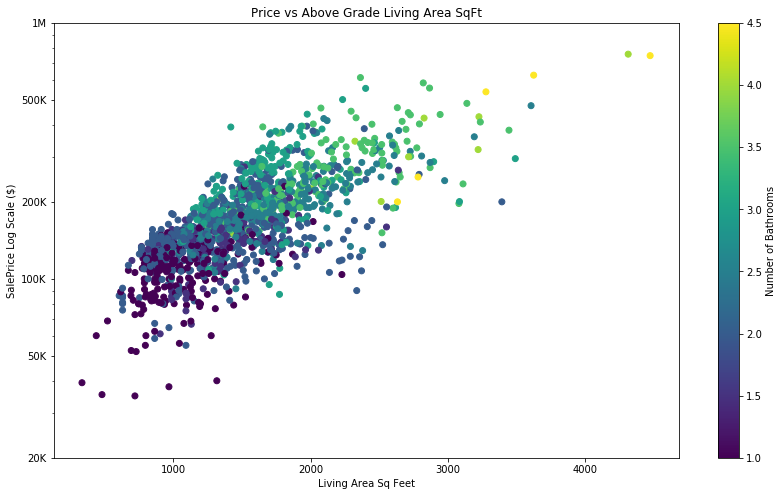

In [89]:
plt.figure(figsize=[14,8])
scat = plt.scatter(data = df_clean, x = 'GrLivArea', y = 'SalePrice', c = 'TotBaths')
plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price vs Above Grade Living Area SqFt')
plt.ylabel('SalePrice Log Scale ($)')
plt.xlabel('Living Area Sq Feet')
cbar = plt.colorbar(scat)
cbar.set_label('Number of Bathrooms');

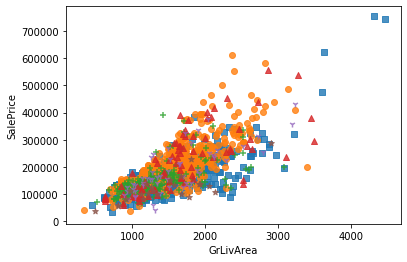

In [90]:
#Review Building Material Types
#This plot is far too busy so I'll try a different approach below.
ttype_markers = [['Wood','s'],
                ['Vinly','o'],
                 ['Metal','+'],
                 ['Cement','^'],
                 ['Brick','1'],
                 ['Other','*']]

for mat, marker in ttype_markers:
    plot_data = df_clean.loc[df_clean['Ext']==mat]
    sns.regplot(data=plot_data, x='GrLivArea', y='SalePrice', x_jitter=0.05, 
            fit_reg= False, marker = marker)

plt.show()

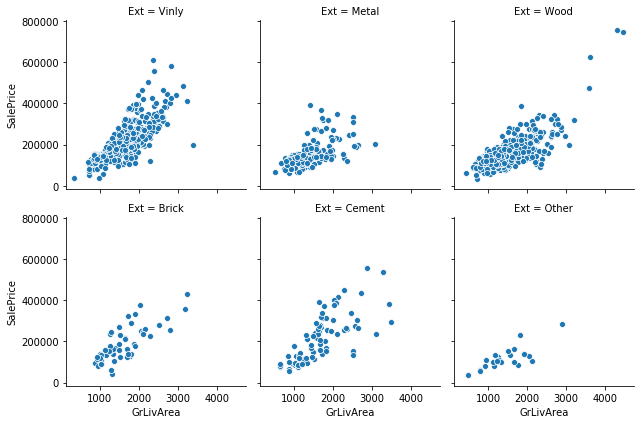

In [91]:
#Try facetting the building material types to see impact on SalePrice
g = sns.FacetGrid(data = df_clean, col='Ext', col_wrap=3)
g.map(sns.scatterplot, 'GrLivArea', 'SalePrice');

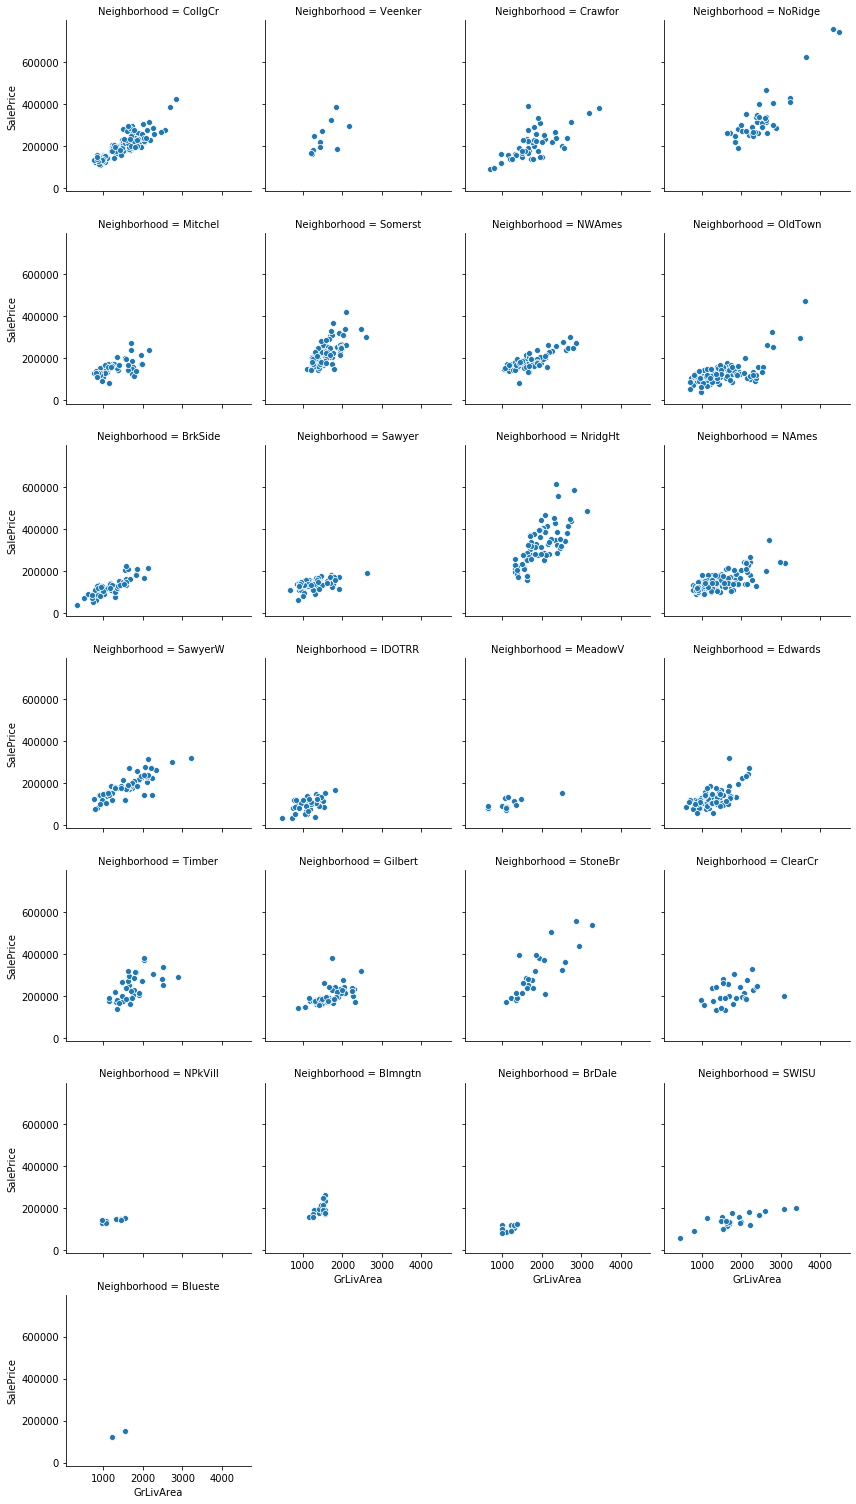

In [92]:
#Try facetting the building material types to see impact on SalePrice
g = sns.FacetGrid(data = df_clean, col='Neighborhood', col_wrap=4)
g.map(sns.scatterplot, 'GrLivArea', 'SalePrice');

In [93]:
#Separate out a few neighbourhoods at Low, Mid and High Range

hoods = ['MeadowV','IDOTRR','Mitchel','NoRidge','NridgHt']
df_hoods = df_clean.loc[df_clean['Neighborhood'].isin(hoods)]

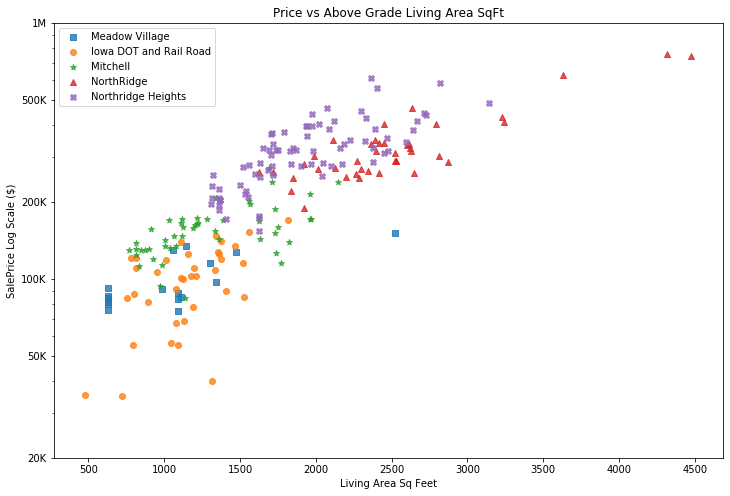

In [94]:
#Review Price vs Living Area (Hue: Neighbourhood)
ttype_markers = [['MeadowV','s'],
                ['IDOTRR','o'],
                 ['Mitchel','*'],
                 ['NoRidge','^'],
                 ['NridgHt','X']]

abbr_marker = {'MeadowV':"Meadow Village",
              'IDOTRR': 'Iowa DOT and Rail Road',
              'Mitchel': 'Mitchell',
              'NoRidge':'NorthRidge',
              'NridgHt':'Northridge Heights'}

plt.figure(figsize=[12,8])

for mat, marker in ttype_markers:
    plot_data = df_hoods.loc[df_hoods['Neighborhood']==mat]
    sns.regplot(data=plot_data, x='GrLivArea', y='SalePrice', x_jitter=0.05, 
            fit_reg= False, marker = marker, label=abbr_marker[mat])

plt.yscale('log')
plt.yticks([2e4,5e4,1e5,2e5,5e5,1e6],['20K','50K','100K','200K','500K','1M'])
plt.title('Price vs Above Grade Living Area SqFt')
plt.ylabel('SalePrice Log Scale ($)')
plt.xlabel('Living Area Sq Feet')
plt.legend(loc='best')
plt.show()

<a id='multi_summary'></a>
## Multivariate Exploration Summary
During the exploration of the data I was able to deduce that Sales Price was 
not normally distributed due to a number of expensive properties skewing
the data to the right. This was resolved by applying a logarithmic transform
to the SalePrice data. Once transformed, the SalePrice then closely followed a
normal distribution.

I found strong a positive correlation between logarithmic SalePrice and 
GrdLivArea (available living area in the property). There were similar, yet 
weaker, correlations between total number of rooms, bathrooms, and car spaces. 
These are all expected results because they indicate that as house size 
increases the value also increases. Larger homes demand a higher sales price.

A note on bathrooms. The original dataset had four different features for
bathrooms which consisted of full and half bathrooms and basement and above 
grade bathrooms. These were amalgamated into one feature of Total Bathrooms.

In terms of categorical variables, Overall Quality (ordinal) had the strongest
correlation with logarithmic SalePrice. Once again this is intuitive, as 
it is common to pay proportionally more for higher quality.

There were also obvious correlations between Building Material and Neighbourhood.
The more expensive homes tended to be build from Vinyl, mid range homes were 
more often wood, whilst low end homes tended to have a higher proportion of 
metal, asbestos and asphalt.

The dataset consisted of 25 Neighbourhoods. The price of homes did vary
considerably in some neighbourhoods, but there was certainly a correlation
between neighbourhood and house price. Some neighbourhoods only contained 
properties at the lower end of the price scale, such as Meadow Village, whilst 
others contained a substantial percentage in the upper price band, such as 
Northridge.

### Save Final DataFrame to csv

In [95]:
df_clean.to_csv('Final_Housing_Data_150520.csv',index=False)

<a id='Ref'></a>
## References

* 1 - [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks)
* 2 - [Ames Housing Data](http://web.stanford.edu/class/stats191/data/amesdoc.txt)